# Data cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the data of complaints on consumeraffairs.com
comp = pd.read_csv('complaints.csv')

In [3]:
comp.head()

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [4]:
comp.shape

(5659, 4)

In [5]:
comp.rating.value_counts()

1    3734
0    1560
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

In [6]:
comp.dtypes

author       object
posted_on    object
rating        int64
text         object
dtype: object

In [7]:
comp.isnull().sum()

author        0
posted_on     0
rating        0
text         30
dtype: int64

In [8]:
comp.posted_on.value_counts()

Feb. 24, 2016     64
March 2, 2016     13
July 28, 2015     11
Jan. 28, 2015     11
Nov. 18, 2014     10
Nov. 6, 2014      10
Feb. 12, 2015     10
Nov. 4, 2014      10
Sept. 1, 2015     10
Aug. 11, 2015     10
July 8, 2015      10
Aug. 6, 2015      10
June 30, 2015     10
Sept. 12, 2015    10
Dec. 10, 2014     10
Jan. 15, 2015      9
Jan. 23, 2015      9
Dec. 16, 2015      9
Sept. 30, 2015     9
April 10, 2015     9
Jan. 6, 2015       9
March 23, 2015     8
Aug. 30, 2011      8
May 31, 2015       8
Feb. 10, 2015      8
Oct. 13, 2015      8
June 26, 2015      8
May 8, 2015        8
Sept. 25, 2015     8
July 16, 2015      8
                  ..
Dec. 10, 2010      1
Dec. 26, 2015      1
Dec. 4, 2009       1
Aug. 30, 2014      1
Jan. 2, 2009       1
April 28, 2014     1
July 28, 2009      1
April 28, 2012     1
Nov. 5, 2009       1
July 10, 2009      1
Aug. 9, 2010       1
April 22, 2010     1
Aug. 9, 2013       1
July 15, 2008      1
Jan. 4, 2014       1
Jan. 4, 2013       1
Jan. 4, 2011 

In [9]:
# extract locations from author as a feature
import re
comp['location'] = comp.author.apply(lambda x: ''.join(re.findall('\,\s[A-Z]{2}', x))[2:])

In [10]:
# extract year from posted time as a feature
comp['year'] = comp.posted_on.apply(lambda x: x.split(', ')[-1].strip())

In [11]:
comp.head()

,author,posted_on,rating,text,location,year
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,MI,2016
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,PA,2016
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,CA,2016
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,NH,2016
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,WA,2016


In [12]:
comp.year = pd.to_numeric(comp.year)

In [13]:
comp.dtypes

author       object
posted_on    object
rating        int64
text         object
location     object
year          int64
dtype: object

In [14]:
comp.location.value_counts()

FL    778
CA    554
GA    414
IL    378
PA    326
NJ    278
TX    274
MI    266
TN    244
MD    238
WA    215
VA    215
MA    184
CO    182
IN    144
MN    108
      105
OR    100
CT     75
UT     62
AL     55
NH     45
SC     41
DC     41
DE     40
NM     38
MS     35
NY     32
LA     28
AZ     22
WV     21
KY     21
AR     19
VT     12
OH     12
MO     12
WI      9
NC      7
ME      7
NV      5
KS      4
ID      2
ND      2
HI      2
PE      1
OT      1
WY      1
ON      1
BC      1
AK      1
NE      1
Name: location, dtype: int64

In [15]:
comp.year.value_counts()

2015    1477
2016     846
2014     770
2009     462
2008     441
2012     418
2010     415
2011     357
2013     313
2007     106
2006      34
2004      10
2003       6
2001       2
2002       1
2000       1
Name: year, dtype: int64

In [77]:
comp.dropna(inplace=True)

In [79]:
# reset index after dropping nulls
comp.reset_index(drop=True, inplace=True)

In [80]:
comp.shape

(5629, 7)

# Tokenization & Feature engineering

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [114]:
# define a function to use textblob and nltk to lemmatize words and delete stopwords
def lemmas(text):
    text = unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words if word not in stopwords.words('english')]

In [121]:
tvec = TfidfVectorizer(analyzer=lemmas, strip_accents='unicode')

In [122]:
complaints = pd.DataFrame(tvec.fit_transform(comp['text']).todense(), columns = tvec.get_feature_names())

In [81]:
# calculate the length of text as a feature. Intuition: the angrier you are, the more you want to curse
comp['length'] = comp['text'].apply(lambda x: len(x))

In [82]:
# label locations
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
le = LabelEncoder()
enc = OneHotEncoder()
scaler = StandardScaler()
comp.location = le.fit_transform(comp.location)

In [123]:
X = pd.concat([complaints, comp.location, comp.year, comp.length], axis=1).as_matrix()
y = comp.rating

In [124]:
X.shape

(5629, 21763)

In [47]:
# unbalanced data
y.value_counts()

1    3734
0    1530
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

# Sentiment Analysis

In [45]:
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [87]:
# define a function to print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

def make_confusion(pred):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[5,4,3,2,1,0]))
    confusion = pd.DataFrame(conmat, index=['5', '4', '3', '2', '1', '0'], 
                             columns=['pred 5', 'pred 4', 'pred 3', 'pred 2', 'pred 1', 'pred 0'])
    print confusion

In [128]:
# xgboost accuracy score, pretty impressive
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9206631142687981

In [129]:
# The algorithm failed to catch any rating over 2, which is more or less expected. 
# But did a good job in seperating 0 and 1.
make_confusion(xgb_pred)

   pred 5  pred 4  pred 3  pred 2  pred 1  pred 0
5       0       0       0       0      10       0
4       0       0       0       0       5       1
3       0       0       0       0      16       0
2       0       0       0       0      78       0
1       0       0       0       0    1116       4
0       0       0       0       0      20     439


# Try ngram=(1,2)

In [115]:
# set min_df=2 to limit dimensions
tvec2 = TfidfVectorizer(analyzer=lemmas, strip_accents='unicode', ngram_range=(1,2), min_df=2)
complaints2 = pd.DataFrame(tvec2.fit_transform(comp['text']).todense(), columns = tvec2.get_feature_names())

In [116]:
# much less features
complaints2.shape

(5629, 9400)

In [117]:
X = pd.concat([complaints2, comp.location, comp.year, comp.length], axis=1).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [118]:
# marginally lower accuracy score
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.91947898164594433

In [119]:
make_confusion(xgb_pred)

   pred 5  pred 4  pred 3  pred 2  pred 1  pred 0
5       0       0       0       0      10       0
4       0       0       0       0       5       1
3       0       0       0       0      16       0
2       0       0       0       0      78       0
1       1       0       0       0    1114       5
0       0       0       0       0      20     439


In [120]:
# Check feature importances. Year is very predictive. In terms of issues, cable is the biggest one.
feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = pd.concat([complaints2, comp.location, comp.year, comp.length], axis=1).columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(20)

,importance
year,0.112727
location,0.023636
cable,0.023273
length,0.022545
customer,0.020364
service,0.018909
good,0.015636
comcast,0.013818
never,0.013818
n't,0.013455


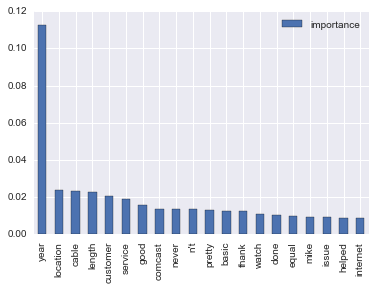

In [131]:
feature_importances.head(20).plot(kind='bar')

# Clustering

In [132]:
# Load the data of complaints on fcc website. Since there is no target, try to do some unsupervised learning.
fcc = pd.read_csv('fcc.csv')

In [133]:
fcc.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...


In [134]:
fcc['Customer Complaint'].value_counts()

Comcast                                                                                      83
Comcast Internet                                                                             18
Comcast Data Cap                                                                             17
comcast                                                                                      13
Data Caps                                                                                    11
Comcast Billing                                                                              11
Comcast Data Caps                                                                            11
Unfair Billing Practices                                                                      9
Data Cap                                                                                      8
Comcast data cap                                                                              8
Comcast internet                        

In [247]:
# Tokenize description
descrip = tvec.fit_transform(fcc.Description)

In [248]:
descrip.shape

(2225, 17131)

In [158]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [232]:
# cluster description into 2 clusters
km = KMeans(n_clusters=2, n_jobs=-1, random_state=1)

In [249]:
km.fit(descrip)
km.labels_

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [250]:
fcc['cluster'] = km.labels_

In [251]:
fcc.cluster.value_counts()

0    1502
1     723
Name: cluster, dtype: int64

In [236]:
# Tokenize customer compliants
topic = tvec.fit_transform(fcc['Customer Complaint'])

In [237]:
topic.shape

(2225, 1397)

In [238]:
# cluster Customer Complaints
km.fit(topic)
fcc['topic'] = km.labels_

In [239]:
fcc.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description,cluster,topic
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...,0,0
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...,0,0
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...,0,0
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...,0,0
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...,0,0


In [252]:
# topics extracted from Customer Complaints and Description are 60% similar when clusters=2.
metrics.accuracy_score(fcc.topic, fcc.cluster)

0.61258426966292134